In [7]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
          'figure.figsize': (20, 18),
          'figure.titlesize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'lines.markersize': 10
          }
pylab.rcParams.update(params)

(-0.5, 1499.5, 999.5, -0.5)

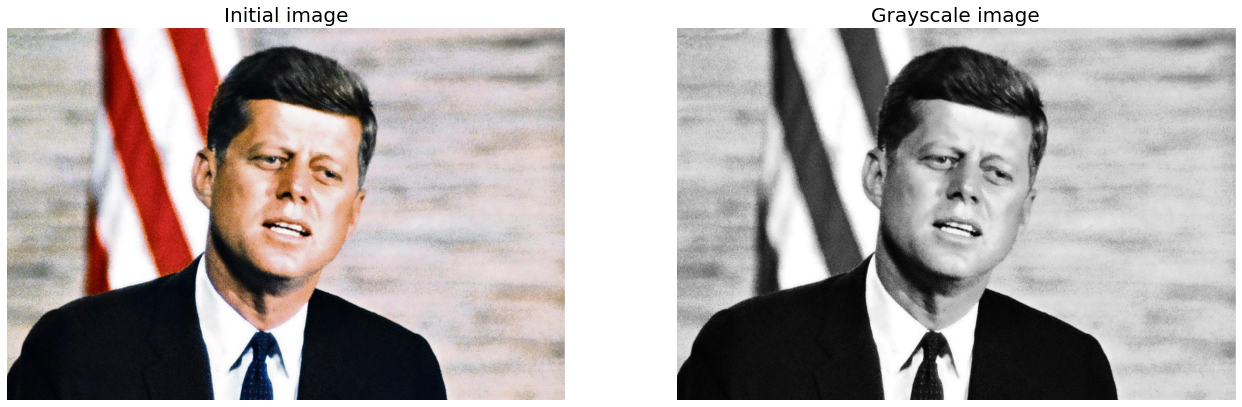

In [111]:
import matplotlib.pyplot as plt
from skimage import io, color

fig,ax=plt.subplots(nrows = 1, ncols = 2)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)

image = io.imread('images/jfk.jpg')

ax[0].imshow(image, cmap = 'gray')
ax[0].set_title('Initial image', fontsize=20)
ax[0].axis('off')

image = color.rgb2gray(image)

ax[1].imshow(image, cmap=plt.cm.gray)
ax[1].set_title('Grayscale image', fontsize=20)
ax[1].axis('off')



In [9]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
          'figure.figsize': (22, 28),
          'figure.titlesize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'lines.markersize': 10
          }
pylab.rcParams.update(params)

(-0.5, 1499.5, 999.5, -0.5)

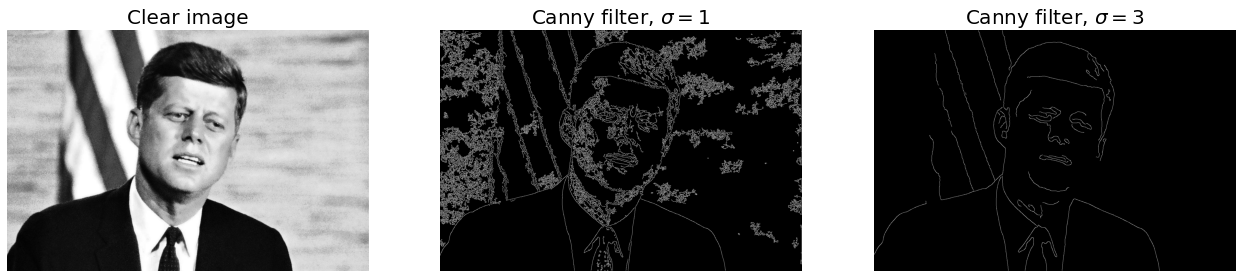

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from skimage.util import random_noise

edges1 = feature.canny(image, sigma=1, low_threshold=0.05, high_threshold=0.32)
edges3 = feature.canny(image, sigma=3, low_threshold=0.05, high_threshold=0.32)

fig,ax=plt.subplots(nrows = 1, ncols = 3)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Clear image', fontsize=20)
ax[0].axis('off')
ax[1].imshow(edges1 , cmap=plt.cm.gray)
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)
ax[1].axis('off')
ax[2].imshow(edges3, cmap=plt.cm.gray)
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)
ax[2].axis('off')


(-0.5, 649.5, 429.5, -0.5)

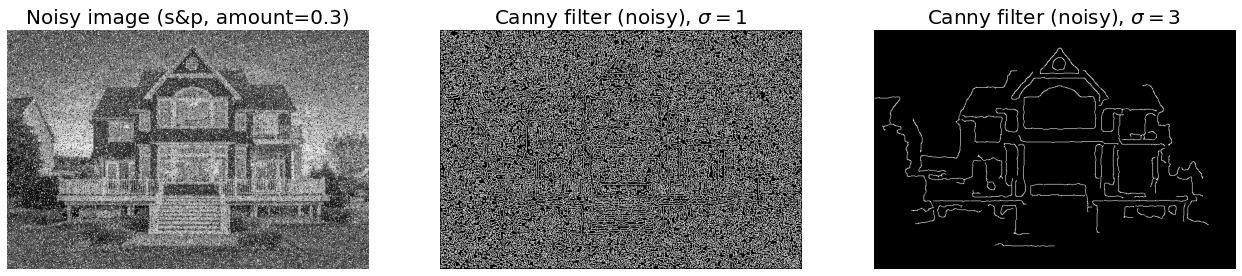

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from skimage.util import random_noise

noised_img = random_noise(image, 's&p', amount=0.2)
noised_edges1 = feature.canny(noised_img, sigma=1, low_threshold=0.05, high_threshold=0.3)
noised_edges3 = feature.canny(noised_img, sigma=3, low_threshold=0.05, high_threshold=0.3)

fig,ax=plt.subplots(nrows = 1, ncols = 3)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)

ax[0].imshow(noised_img, cmap=plt.cm.gray)
ax[0].set_title('Noisy image (s&p, amount=0.3)', fontsize=20)
ax[0].axis('off')
ax[1].imshow(noised_edges1 , cmap=plt.cm.gray)
ax[1].set_title(r'Canny filter (noisy), $\sigma=1$', fontsize=20)
ax[1].axis('off')
ax[2].imshow(noised_edges3, cmap=plt.cm.gray)
ax[2].set_title(r'Canny filter (noisy), $\sigma=3$', fontsize=20)
ax[2].axis('off')



(-0.5, 899.5, 1199.5, -0.5)

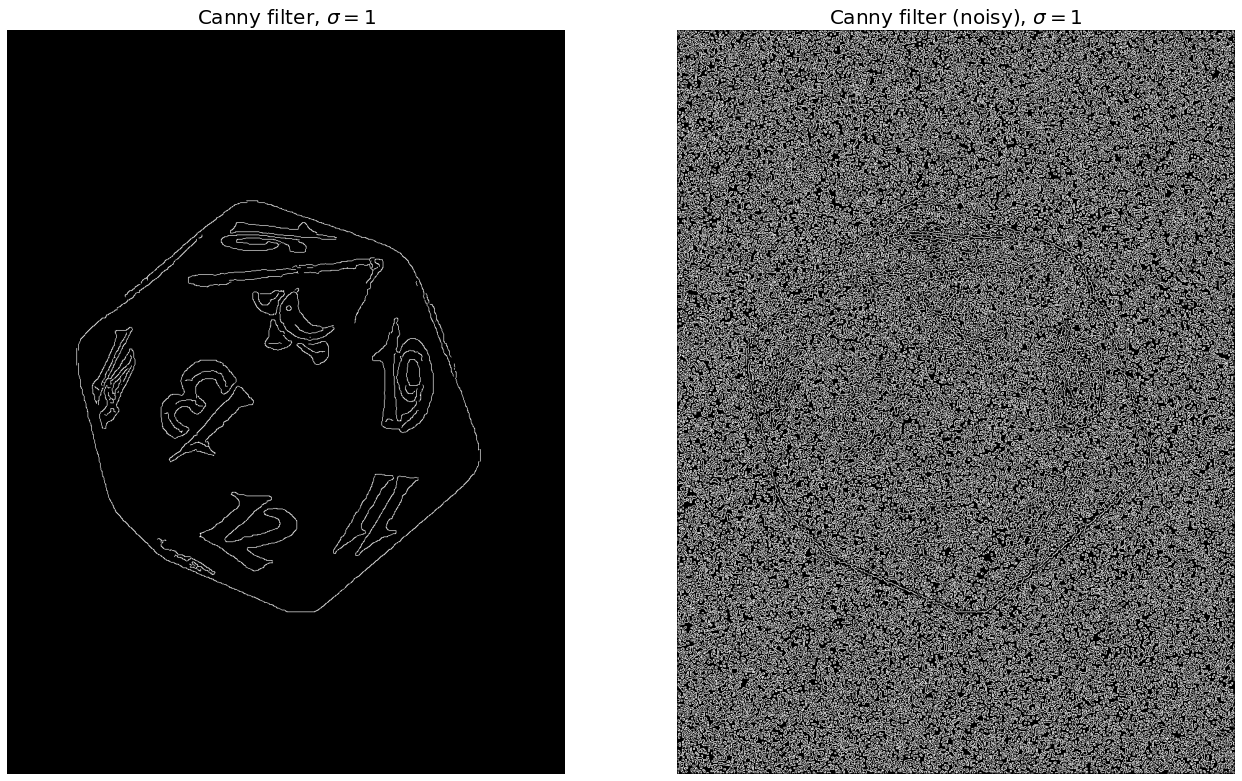

In [103]:
fig,ax=plt.subplots(nrows = 1, ncols = 2)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)

ax[0].imshow(edges1 , cmap=plt.cm.gray)
ax[0].set_title(r'Canny filter, $\sigma=1$', fontsize=20)
ax[0].axis('off')
ax[1].imshow(noised_edges1 , cmap=plt.cm.gray)
ax[1].set_title(r'Canny filter (noisy), $\sigma=1$', fontsize=20)
ax[1].axis('off')

(-0.5, 899.5, 1199.5, -0.5)

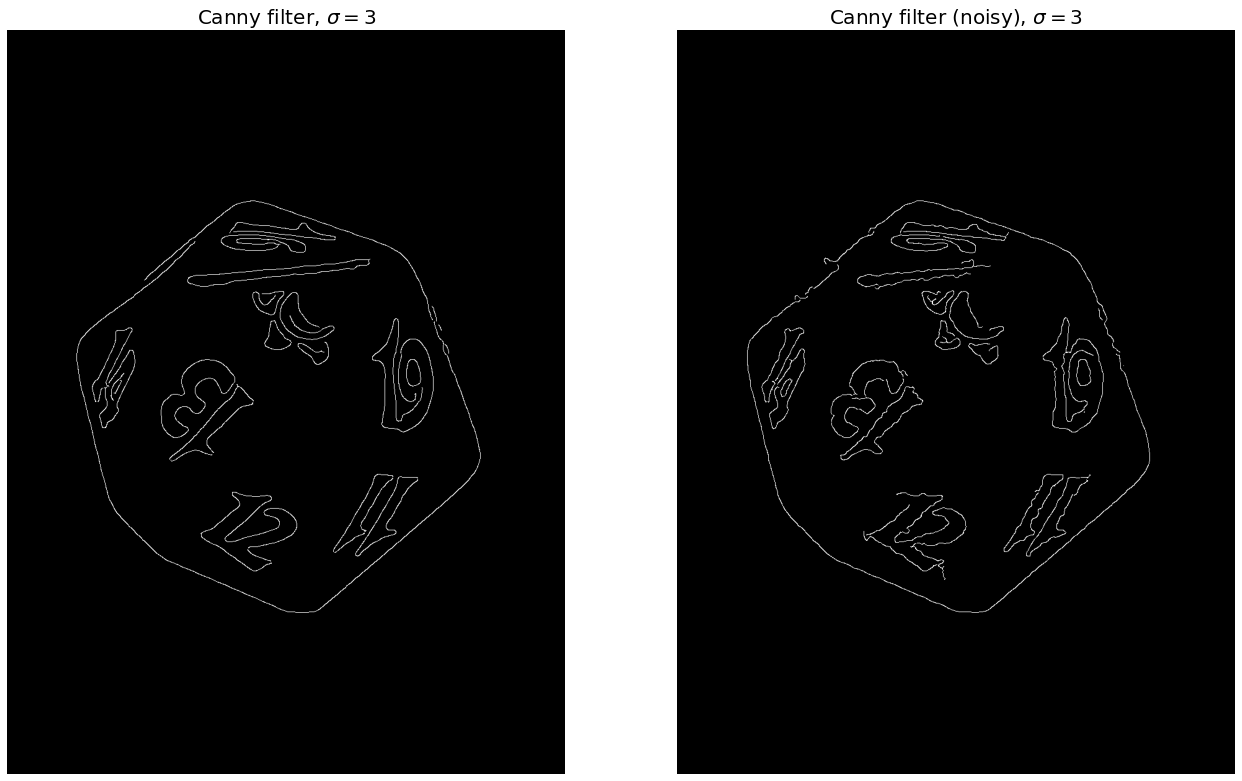

In [104]:
fig,ax=plt.subplots(nrows = 1, ncols = 2)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)

ax[0].imshow(edges3, cmap=plt.cm.gray)
ax[0].set_title(r'Canny filter, $\sigma=3$', fontsize=20)
ax[0].axis('off')
ax[1].imshow(noised_edges3, cmap=plt.cm.gray)
ax[1].set_title(r'Canny filter (noisy), $\sigma=3$', fontsize=20)
ax[1].axis('off')

In [27]:
from scipy.ndimage import distance_transform_edt

def fom(edges_img, edges_gold, alpha = 1.0/9):
        #Computes Pratt's Figure of Merit for given edges_img and gold standard #image edges_gold
        # Compute distance transform for gold standard image.
    dist = distance_transform_edt(np.invert(edges_gold))

    fomm = 1.0 / np.maximum(
            np.count_nonzero(edges_img),
            np.count_nonzero(edges_gold))
    N, M = edges_img.shape

    for i in range(0, N):
        for j in range(0, M):
            if edges_img[i, j]:
                fomm += 1.0 / (1.0 + dist [i, j] * dist [i, j] * alpha)

    fomm /= np.maximum(
            np.count_nonzero(edges_img),
            np.count_nonzero(edges_gold))
    return fomm




In [105]:
print(fom(noised_edges1, edges1))

0.06668908946526503


In [106]:
print(fom(noised_edges3, edges3))

0.8977490143165984
